In [1]:
import matplotlib.pyplot as plt

# Define the functions

In [2]:
from scipy import stats
import numpy as np
def call_option_price(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)


def put_option_price(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)

def delta(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))
    return stats.norm.cdf(d1)

def Theta_call(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S * stats.norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * stats.norm.cdf(d2)

def Theta_put(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S * stats.norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * stats.norm.cdf(-d2)

def Gamma(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2 /2 ) * T)/ (sigma * np.sqrt(T))
    return stats.norm.pdf(d1) / (S * sigma * np.sqrt(T)) 

In [9]:
S = 49
K = 50
r = 0.05
sigma = 0.2
T = 0.3846

delta(S, K, r, sigma,  T)

0.5462489714554487

# Call / Put price

## Variation of call/ put price with respect to stock price

In [10]:
S = np.linspace(30, 80, 1000)
K = 50
r = 0.05
sigma = 0.2
T = 0.3846
call_values = call_option_price(S, K, r, sigma,  T)
put_values = put_option_price(S, K, r, sigma, T)

In [11]:
call_lower_bound = S - K * np.exp(-r * T)
call_upper_bound = S
put_lower_bound = K * np.exp(- r * T) - S
put_upper_bound = [K] * len(S) 

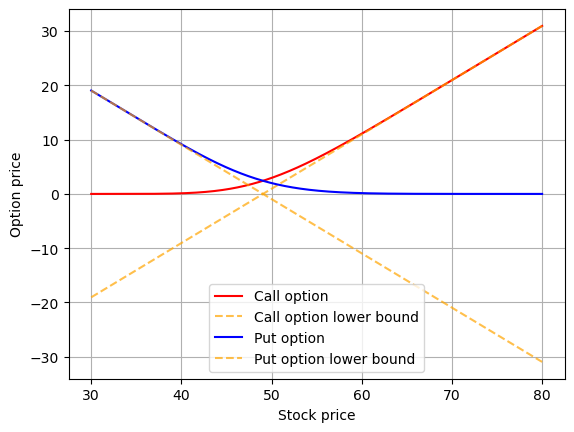

In [12]:
plt.plot(S, call_values, label='Call option',  color = 'red')
plt.plot(S, call_lower_bound, label='Call option lower bound', linestyle='--', color = 'orange', alpha = 0.7)
#plt.plot(S, call_upper_bound, label='Call option upper bound', linestyle='--')


plt.plot(S, put_values, label='Put option',  color = 'blue')
plt.plot(S, put_lower_bound, label='Put option lower bound', linestyle='--', color = 'orange',alpha = 0.7)
#plt.plot(S, put_upper_bound, label='Put option upper bound', linestyle='--')

plt.xlabel('Stock price')
plt.ylabel('Option price')
plt.legend()
plt.grid()
plt.show()

# $\Delta $

## Variation of $\Delta$ with respect to the stock price

In [13]:
S = np.linspace(40, 60, 1000)
K = 50
r = 0.05
sigma = 0.2
T = 0.3846
delta_values = delta(S, K, r, sigma,  T)
delta_put_values = delta(S, K, r, sigma,  T)-1

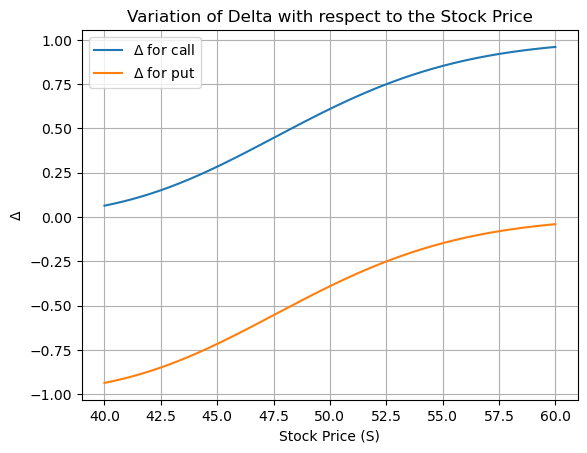

In [14]:
plt.plot(S, delta_values, linestyle='-', label=r'$\Delta$ for call')
plt.plot(S, delta_put_values, linestyle='-', label=r'$\Delta$ for put')
plt.xlabel('Stock Price (S)')
plt.ylabel(r'$\Delta$')
plt.title('Variation of Delta with respect to the Stock Price')
plt.grid(True)
plt.legend()
plt.show()

## Variation of $\Delta$ with respect to the time to maturity

In [15]:
S = 49
K = 50
r = 0.05
sigma = 0.2
T = np.linspace(0, 10, 1000)

In [16]:
delta_values_otm = delta(40, K, r, sigma,  T)

delta_values_atm = delta(50, K, r, sigma,  T)

delta_values_itm = delta(60, K, r, sigma,  T)

/tmp/ipykernel_49968/2301850580.py:15: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_49968/2301850580.py:15: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))


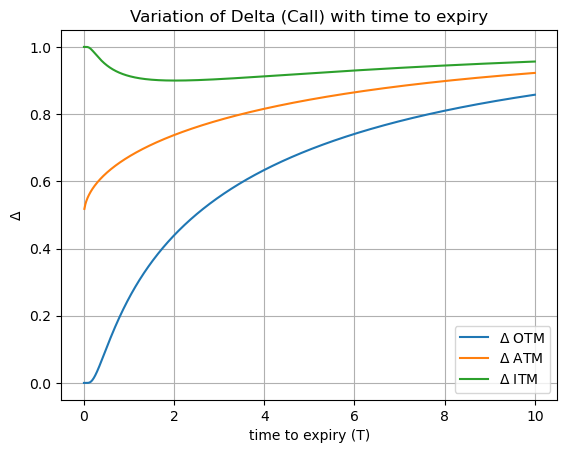

In [17]:
plt.plot(T, delta_values_otm, linestyle='-', label=r'$\Delta$ OTM')
plt.plot(T, delta_values_atm, linestyle='-', label=r'$\Delta$ ATM')
plt.plot(T, delta_values_itm, linestyle='-', label=r'$\Delta$ ITM')


plt.xlabel('time to expiry (T)')
plt.ylabel(r'$\Delta$')
plt.title('Variation of Delta (Call) with time to expiry')
plt.grid(True)
plt.legend()
plt.show()

# $\Theta$

## Variation of call/ put price with respect to time to maturity

In [ ]:
S_itm = 60
S_atm = 50
S_otm = 40
K = 50
r = 0.05
sigma = 0.2
T = np.linspace(0, 20, 1000)

call_values_deepotm = call_option_price(30, K, r, sigma,  T)
call_values_itm = call_option_price(S_itm, K, r, sigma,  T)
call_values_otm = call_option_price(S_otm, K, r, sigma,  T)
call_values_atm = call_option_price(S_atm, K, r, sigma,  T)


/tmp/ipykernel_49968/2301850580.py:4: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_49968/2301850580.py:4: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))


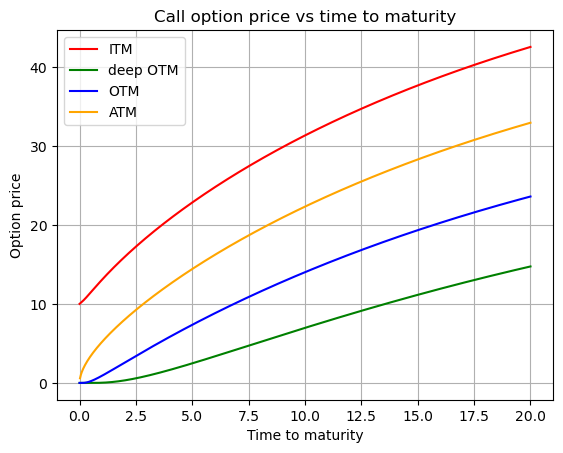

In [ ]:
plt.plot(T, call_values_itm, label='ITM',  color = 'red')
plt.plot(T, call_values_deepotm, label='deep OTM',  color = 'green')
plt.plot(T, call_values_otm,  label='OTM',  color = 'blue')
plt.plot(T, call_values_atm, label='ATM',  color = 'orange')

plt.title("Call option price vs time to maturity")
plt.xlabel('Time to maturity')
plt.ylabel('Option price')
plt.legend()
plt.grid()
plt.show()

In [ ]:

S_atm = 50

K = 50
r = 0.05
sigma = 0.2
T = np.linspace(0, 20, 1000)

call_values_atm = call_option_price(S_atm, K, r, 0.2,  T)
call_values_atm_ = call_option_price(S_atm, K, r, 0.5,  T)
call_values_atm = call_option_price(S_atm, K, r, 0.2,  T)


/tmp/ipykernel_49968/894204655.py:4: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S/K) + (r + sigma**2) * T) / (sigma * np.sqrt(T))


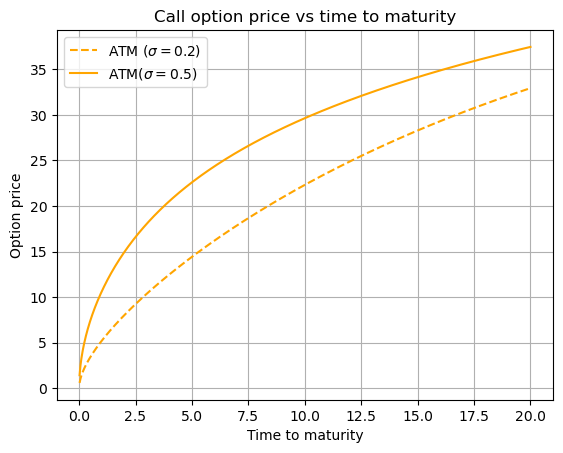

In [81]:
plt.plot(T, call_values_atm, label=r'ATM ($\sigma = 0.2$)',  color = 'orange', linestyle = '--')
plt.plot(T, call_values_atm_, label=r'ATM($\sigma = 0.5$)',  color = 'orange', linestyle = '-')

plt.title("Call option price vs time to maturity")
plt.xlabel('Time to maturity')
plt.ylabel('Option price')
plt.legend()
plt.grid()
plt.show()

## Variation of Theta with respect to Stock price

In [39]:
S = np.linspace(30, 80, 1000)
K = 50
r = 0.05
sigma = 0.2
T = 0.4
call_theta = Theta_call(S, K, r, sigma,  T)
put_theta = Theta_put(S, K, r, sigma, T)

call_theta_ = Theta_call(S, K, r, sigma,  0.1)
put_theta_ = Theta_put(S, K, r, sigma, 0.1)

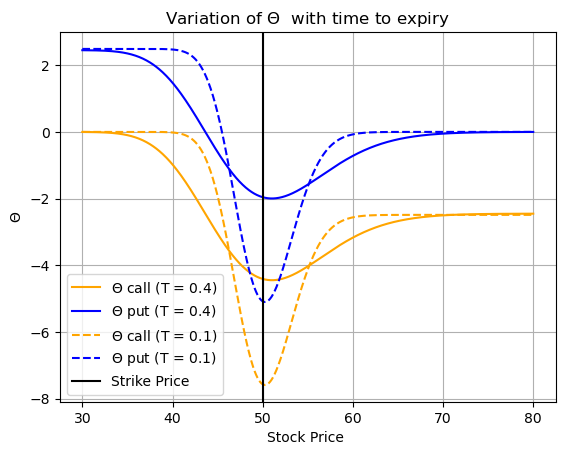

In [43]:
plt.plot(S,call_theta , linestyle='-', label=r'$\Theta$ call (T = 0.4)', color = 'orange')
plt.plot(S,put_theta, linestyle='-', label=r'$\Theta$ put (T = 0.4)', color = 'blue')

plt.plot(S,call_theta_ , linestyle='--', label=r'$\Theta$ call (T = 0.1)', color = 'orange')
plt.plot(S,put_theta_, linestyle='--', label=r'$\Theta$ put (T = 0.1)', color = 'blue')


plt.axvline(x= 50, color='black', label = 'Strike Price')
plt.xlabel('Stock Price ')
plt.ylabel(r'$\Theta$')
plt.title(r'Variation of $\Theta$  with time to expiry')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
S = np.linspace(30, 80, 1000)
K = 50
r = 0.05
T = 0.4
call_theta = Theta_call(S, K, r, 0.2,  T)
put_theta = Theta_put(S, K, r, 0.2, T)

call_theta_ = Theta_call(S, K, r, 0.5,  T)
put_theta_ = Theta_put(S, K, r, 0.5, T)

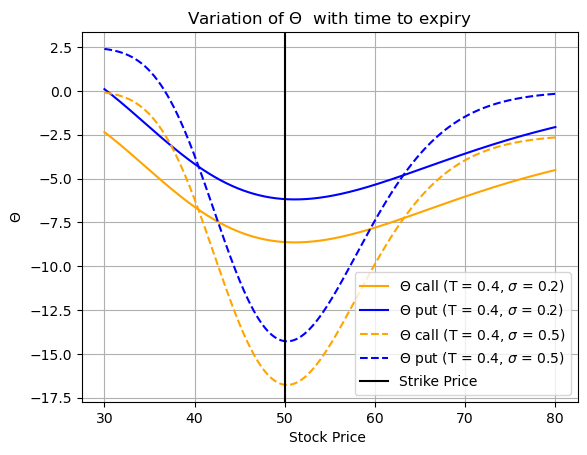

In [76]:
plt.plot(S,call_theta , linestyle='-', label=r'$\Theta$ call (T = 0.4, $\sigma$ = 0.2)', color = 'orange')
plt.plot(S,put_theta, linestyle='-', label=r'$\Theta$ put (T = 0.4, $\sigma$ = 0.2)', color = 'blue')

plt.plot(S,call_theta_ , linestyle='--', label=r'$\Theta$ call (T = 0.4, $\sigma$ = 0.5)', color = 'orange')
plt.plot(S,put_theta_, linestyle='--', label=r'$\Theta$ put (T = 0.4, $\sigma$ = 0.5)', color = 'blue')


plt.axvline(x= 50, color='black', label = 'Strike Price')
plt.xlabel('Stock Price ')
plt.ylabel(r'$\Theta$')
plt.title(r'Variation of $\Theta$  with time to expiry')
plt.grid(True)
plt.legend()
plt.show()

## Variation of $\Theta$ with time to expiry

In [65]:
S_atm = 50
S_otm = 40
S_itm = 60

K = 50
r = 0.05
sigma = 0.2
T = np.linspace(0.001, 1, 1000)

call_theta_atm = Theta_call(S_atm, K, r, sigma,  T)
put_theta_atm = Theta_put(S_atm, K, r, sigma, T)

call_theta_otm = Theta_call(S_otm, K, r, sigma,  T)
put_theta_otm = Theta_put(S_itm, K, r, sigma, T)

call_theta_itm = Theta_call(S_itm, K, r, sigma,  T)
put_theta_itm = Theta_put(S_otm, K, r, sigma, T)


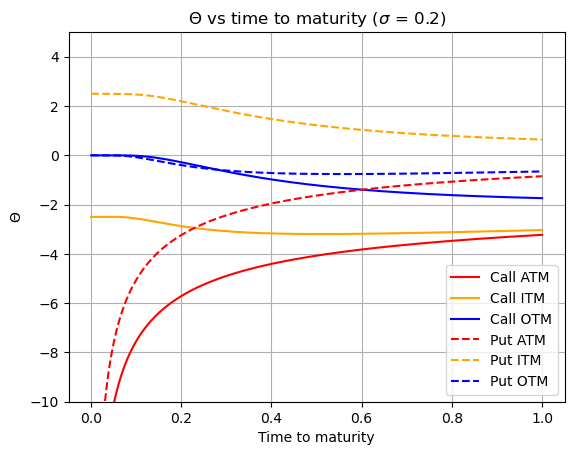

In [66]:
plt.plot(T, call_theta_atm, label='Call ATM',  color = 'red', linestyle = '-')
plt.plot(T, call_theta_itm, label='Call ITM',  color = 'orange', linestyle = '-')
plt.plot(T, call_theta_otm, label='Call OTM',  color = 'blue', linestyle = '-')

plt.plot(T, put_theta_atm, label='Put ATM',  color = 'red', linestyle = '--')
plt.plot(T, put_theta_itm, label='Put ITM',  color = 'orange', linestyle = '--')
plt.plot(T, put_theta_otm, label='Put OTM',  color = 'blue', linestyle = '--')

plt.ylim([-10, 5])
plt.title(r"$\Theta$ vs time to maturity ($\sigma$ = 0.2)")
plt.xlabel('Time to maturity')
plt.ylabel('$\Theta$')
plt.legend()
plt.grid()
plt.show()

In [71]:
S_atm = 50
S_otm = 40
S_itm = 60

K = 50
r = 0.05
sigma = 0.4
T = np.linspace(0.001, 1, 1000)

call_theta_atm = Theta_call(S_atm, K, r, sigma,  T)
put_theta_atm = Theta_put(S_atm, K, r, sigma, T)

call_theta_otm = Theta_call(S_otm, K, r, sigma,  T)
put_theta_otm = Theta_put(S_itm, K, r, sigma, T)

call_theta_itm = Theta_call(S_itm, K, r, sigma,  T)
put_theta_itm = Theta_put(S_otm, K, r, sigma, T)


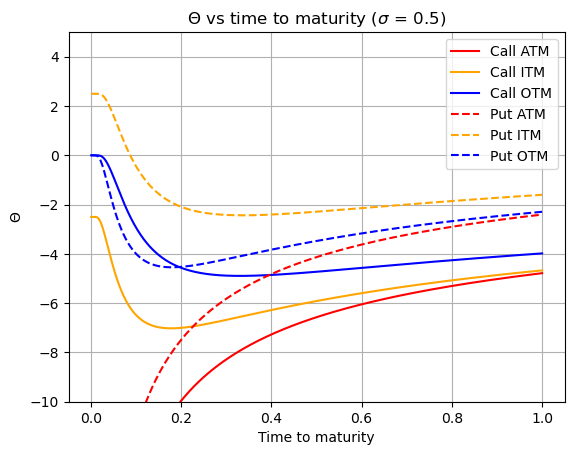

In [73]:
plt.plot(T, call_theta_atm, label='Call ATM',  color = 'red', linestyle = '-')
plt.plot(T, call_theta_itm, label='Call ITM',  color = 'orange', linestyle = '-')
plt.plot(T, call_theta_otm, label='Call OTM',  color = 'blue', linestyle = '-')

plt.plot(T, put_theta_atm, label='Put ATM',  color = 'red', linestyle = '--')
plt.plot(T, put_theta_itm, label='Put ITM',  color = 'orange', linestyle = '--')
plt.plot(T, put_theta_otm, label='Put OTM',  color = 'blue', linestyle = '--')

plt.ylim([-10, 5])
plt.title(r"$\Theta$ vs time to maturity ($\sigma$ = 0.5)")
plt.xlabel('Time to maturity')
plt.ylabel('$\Theta$')
plt.legend()
plt.grid()
plt.show()

# $\Gamma$

In [17]:
S_atm = 50
S_otm = 40
S_itm = 60

K = 50
r = 0.05
sigma = 0.4
T = np.linspace(0.001, 1, 1000)

call_Gamma_atm = Gamma(S_atm, K, r, sigma,  T)
call_Gamma_otm = Gamma(S_otm, K, r, sigma,  T)
call_Gamma_itm = Gamma(S_itm, K, r, sigma,  T)


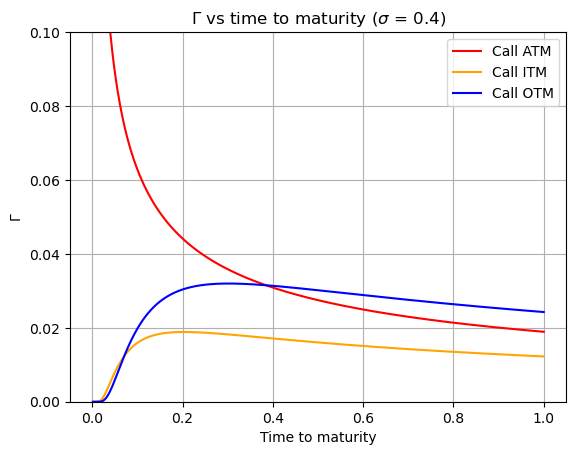

In [19]:
plt.plot(T, call_Gamma_atm, label='Call ATM',  color = 'red', linestyle = '-')
plt.plot(T, call_Gamma_itm, label='Call ITM',  color = 'orange', linestyle = '-')
plt.plot(T, call_Gamma_otm, label='Call OTM',  color = 'blue', linestyle = '-')


plt.ylim([0, 0.1])
plt.title(r"$\Gamma$ vs time to maturity ($\sigma$ = 0.4)")
plt.xlabel('Time to maturity')
plt.ylabel('$\Gamma$')
plt.legend()
plt.grid()
plt.show()

In [ ]:
S = np.linspace(20, 80, 1000)
K = 50
r = 0.05
sigma = 0.2
T = 0.4

call_Gamma1 = Gamma(S, K, r, sigma,  T)
call_Gamma2 = Gamma(S, K, r, 0.3,  T)
call_Gamma3 = Gamma(S, K, r, sigma,  0.6)


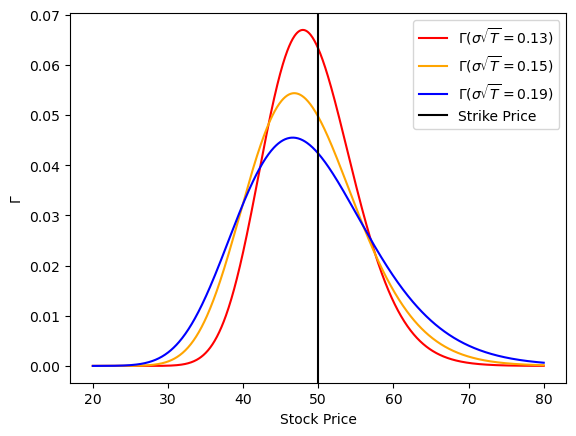

In [32]:
plt.plot(S, call_Gamma1, label = r'$\Gamma (\sigma \sqrt{T} = 0.13 )$', color = 'red')
plt.plot(S, call_Gamma3, label = r'$\Gamma (\sigma \sqrt{T} = 0.15 )$', color = 'orange')
plt.plot(S, call_Gamma2, label = r'$\Gamma (\sigma \sqrt{T} = 0.19 )$', color = 'blue')


plt.axvline(x= 50, color='black', label = 'Strike Price')
plt.xlabel('Stock Price')
plt.ylabel(r'$\Gamma$')
plt.legend()
plt.show()